In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:

country_df = pd.read_csv("Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Checking for null values column wise
country_df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [4]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.5+ KB


In [5]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
#data Cleaning
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
country_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


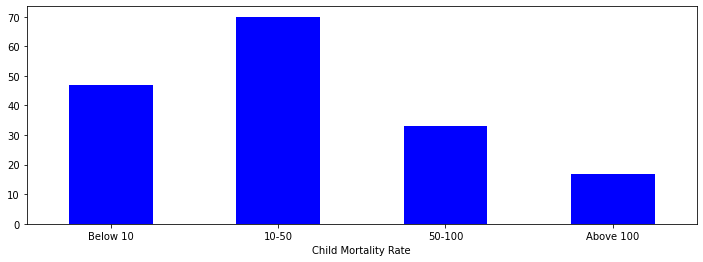

In [8]:
country_df2 = country_df.copy()
bins=[2,10,50,100,300]
slot=['Below 10','10-50','50-100','Above 100']
country_df2['child_mort_range']=pd.cut(country_df2['child_mort'],bins,labels=slot,include_lowest=True)
ax=country_df2['child_mort_range'].value_counts(sort=False).plot.bar(rot=0,color='b',figsize=(12,4))
plt.xlabel("Child Mortality Rate")
plt.show()

In [9]:

# Child Mortality range
ay=country_df2['child_mort_range'].value_counts(sort=False)
ay

Below 10     47
10-50        70
50-100       33
Above 100    17
Name: child_mort_range, dtype: int64

Data Preproessing 

In [10]:
# converting % of GDP columns to per capita values
# exports per capita
country_df['exports'] = round(country_df['exports']*country_df['gdpp']/100,2)
# imports per capita
country_df['imports'] = round(country_df['imports']*country_df['gdpp']/100,2)

In [11]:
# health spent by government per capita
country_df['health'] = round(country_df['health']*country_df['gdpp']/100,2)

Data Visualisation 

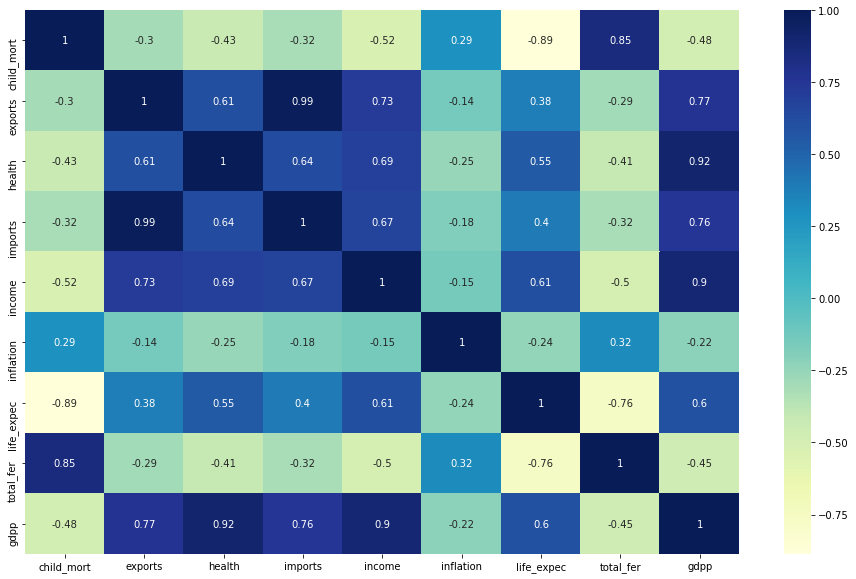

In [12]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(country_df.corr(), annot = True, cmap="YlGnBu")
plt.savefig('corrplot')
plt.show()

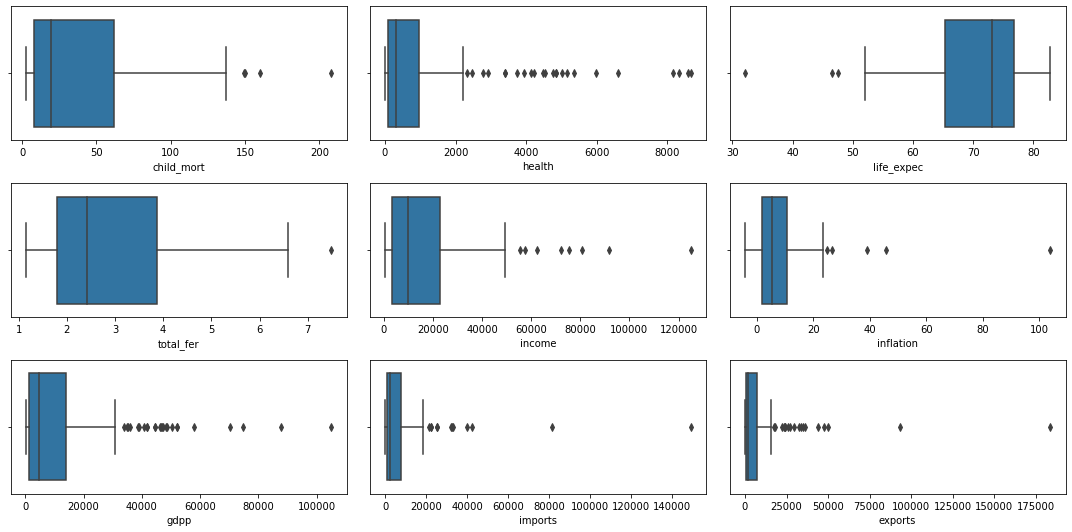

In [13]:
#Outliers Analysis
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(country_df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(country_df['health'], ax = axs[0,1])
plt3 = sns.boxplot(country_df['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(country_df['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(country_df['income'], ax = axs[1,1])
plt6 = sns.boxplot(country_df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(country_df['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(country_df['imports'], ax = axs[2,1])
plt9 = sns.boxplot(country_df['exports'], ax = axs[2,2])


plt.tight_layout()


In [14]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618862,1056.733174,6588.352096,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885789,1801.408921,14710.810423,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.080000,12.820000,0.650000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.890000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [15]:

# Countries having gdpp more than 40,000.
country_df[country_df['gdpp']>=40000.00]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700


In [16]:
country_df[country_df['health']>4000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700
77,Japan,3.2,6675.0,4223.05,6052.0,35800,-1.900,82.8,1.39,44500


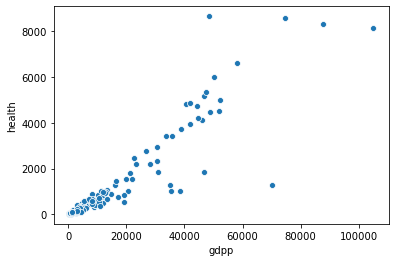

In [17]:
 sns.scatterplot(x='gdpp' , y='health', data=country_df)

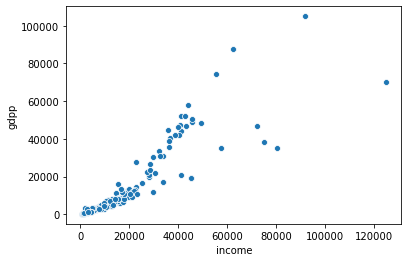

In [18]:
#Countries with high spend on health per capita have low child mortality rate
# relation between child_mort and per capita income
sns.scatterplot(x='income' , y='gdpp', data=country_df)

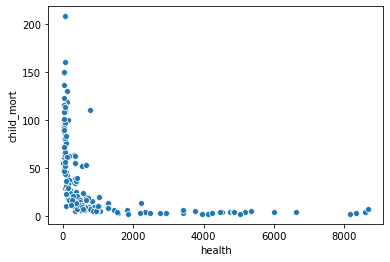

In [19]:
# GDPP Vs Income per capita
sns.scatterplot(y='child_mort' , x='health', data=country_df)

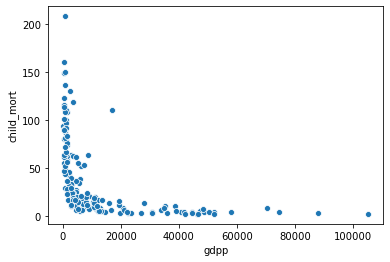

In [20]:
sns.scatterplot(x='gdpp' , y='child_mort', data=country_df)


We can see that the countries havinh High gdpp have high per capita income and also low child mortality rate. We can consider that these countries are not in the direst need of aid & may also influence our cluster formation.

Thus removing countries with high gdpp (gdpp > 40000

In [21]:
# Countries with high GDPP
(country_df['gdpp']>40000).sum()

19

Outlier Treatment

In [22]:

# removing countries with gdpp > 40,000
# removing 19 countries
country_df2 = country_df[country_df['gdpp']<=40000]

In [23]:
# Dataframe after outlier treatment
country_df2.shape

(148, 10)

In [24]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [25]:
# Getting numeric columns in 'data'
data = country_df2.drop(['country'], axis=1)
country = list(country_df2.country)

In [26]:
country_df2.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [27]:
data.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [28]:
# Scaling numeric data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data))
data_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.168674,-0.648257,-0.654165,-0.688763,-0.828040,0.080419,-1.524696,1.771137,-0.768254
1,-0.639507,-0.448865,-0.339655,-0.314712,-0.203537,-0.372963,0.828316,-0.943026,-0.379980
2,-0.376632,-0.345054,-0.453668,-0.441006,0.019392,0.690424,0.851729,-0.135937,-0.339363
3,1.876224,-0.256043,-0.572497,-0.416506,-0.506031,1.267456,-1.068141,1.992436,-0.441454
4,-0.794283,0.357155,0.311357,0.803087,0.484767,-0.652320,0.886848,-0.630605,0.510295


In [29]:
#Scaled data
data_scaled = pd.DataFrame(data_scaled)

In [47]:

data_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']
data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.168674,-0.648257,-0.654165,-0.688763,-0.828040,0.080419,-1.524696,1.771137,-0.768254
1,-0.639507,-0.448865,-0.339655,-0.314712,-0.203537,-0.372963,0.828316,-0.943026,-0.379980
2,-0.376632,-0.345054,-0.453668,-0.441006,0.019392,0.690424,0.851729,-0.135937,-0.339363
3,1.876224,-0.256043,-0.572497,-0.416506,-0.506031,1.267456,-1.068141,1.992436,-0.441454
4,-0.794283,0.357155,0.311357,0.803087,0.484767,-0.652320,0.886848,-0.630605,0.510295


In [48]:

# Implementing PCA with 5 components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [49]:
final_pcs = pca_final.fit_transform(data)

In [50]:
final_pcs.shape

(148, 5)

In [51]:
final_pcs

array([[-1.39034042e+04,  3.72761702e+02, -1.45918373e+02,
         4.98267244e+02,  4.23259214e+00],
       [-4.93397363e+03, -1.56732398e+03, -2.40892312e+02,
        -8.35178759e+02, -1.67361451e+01],
       [-2.41634286e+03, -3.31125157e+03, -6.38549145e+02,
        -5.31244824e+02,  1.90336978e+01],
       [-8.13921335e+03,  5.97336551e+02, -3.39381475e+02,
         8.82825798e+02, -8.40171587e+01],
       [ 8.80644375e+03,  1.11137845e+03, -7.69580783e+01,
        -1.50545186e+03, -2.60416533e+02],
       [ 5.20691905e+03, -4.10296140e+03,  2.44688040e+03,
        -6.27540145e+02,  1.28737622e+02],
       [-8.14172385e+03, -5.48347814e+02,  1.41056944e+02,
        -3.58456763e+02, -1.18662150e+02],
       [ 1.07956717e+03, -4.16300427e+03, -9.09333737e+02,
         2.68273903e+02,  2.28219003e+02],
       [ 2.22870648e+04,  9.79972018e+03,  6.99060835e+03,
         1.01601909e+02, -5.09717590e+02],
       [ 3.35492597e+04, -3.08055261e+03, -3.81121049e+03,
        -1.70192630e+02

In [34]:

# S matrix
pca.explained_variance_ratio_

array([0.61956374, 0.15732552, 0.10334608, 0.05096328, 0.02841048,
       0.02747304, 0.01024102, 0.00140005, 0.00127679])

In [35]:
features=list(data.columns)

In [36]:

# V matrix
pcs_df = pd.DataFrame({'Features':features,'PCA1':pca.components_[0], 'PCA2':pca.components_[1],'PCA3':pca.components_[2],'PCA4':pca.components_[3],
                      'PCA5':pca.components_[4],'PCA6':pca.components_[5],'PCA7':pca.components_[6],'PCA8':pca.components_[7],
                       'PCA9':pca.components_[8]})
pcs_df

,Features,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,child_mort,-0.321941,0.471165,-0.215429,0.076893,-0.073231,0.155601,-0.768808,0.028860,-0.023734
1,exports,0.359562,0.352405,-0.049837,-0.446186,0.105213,-0.040553,-0.018410,-0.475725,0.552804
2,health,0.349588,0.129762,-0.151476,0.745421,0.147692,0.199395,0.063259,-0.449730,-0.120506
3,imports,0.366813,0.251705,-0.153620,-0.285764,0.586356,0.189618,0.024195,0.336655,-0.450714
4,income,0.371729,0.241593,0.109698,-0.167954,-0.647443,-0.220815,-0.026762,-0.129745,-0.526988
5,inflation,-0.104019,0.346508,0.899762,0.096954,0.137528,0.173009,0.035643,0.004311,-0.002452
6,life_expec,0.335383,-0.364648,0.253500,0.101803,0.268946,-0.541729,-0.560281,0.004521,0.013640
7,total_fer,-0.310383,0.449938,-0.131184,0.151905,0.216952,-0.724050,0.292205,-0.006814,-0.064705
8,gdpp,0.390491,0.244487,-0.038554,0.294353,-0.245855,-0.044945,0.052189,0.663581,0.440551


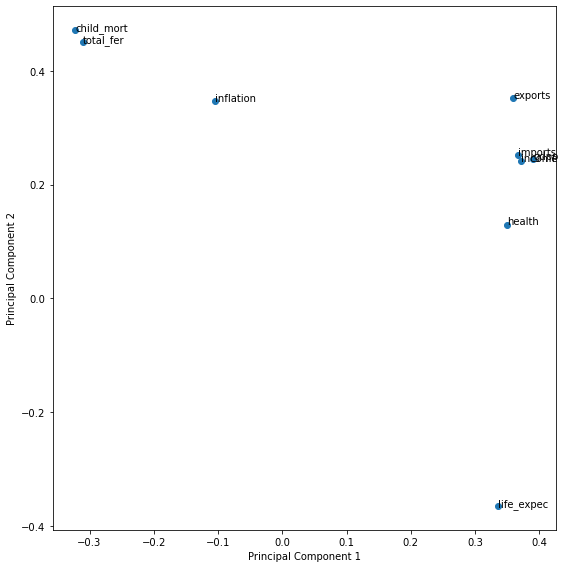

In [37]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PCA1, pcs_df.PCA2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Features):
    plt.annotate(txt, (pcs_df.PCA1[i],pcs_df.PCA2[i]))
plt.tight_layout()
plt.show()

In [38]:
pca.explained_variance_ratio_

array([0.61956374, 0.15732552, 0.10334608, 0.05096328, 0.02841048,
       0.02747304, 0.01024102, 0.00140005, 0.00127679])

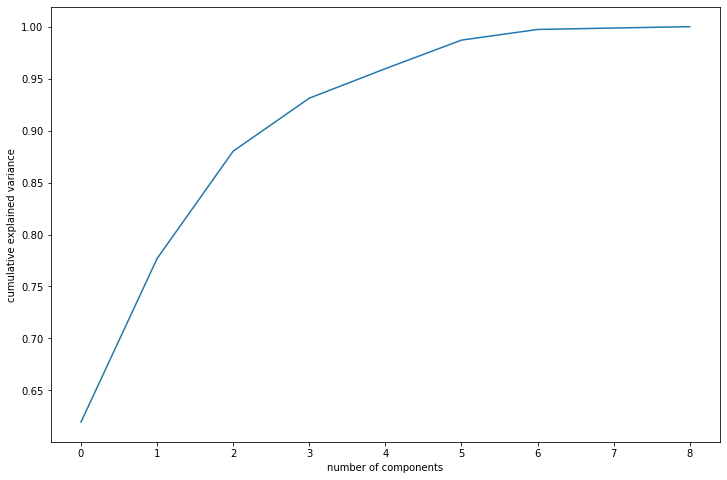

In [39]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

In [40]:
#We'll choose 4 components for our modeling
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [41]:
df_pca = pca_final.fit_transform(data)
df_pca.shape

(148, 4)

In [42]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3
0,-13903.404246,372.761759,-145.918335,498.267248
1,-4933.973629,-1567.323709,-240.892705,-835.179215
2,-2416.342859,-3311.251462,-638.551655,-531.243856
3,-8139.213347,597.337849,-339.378812,882.822197
4,8806.443764,1111.381565,-76.949785,-1505.462046


Creating correlation matrix for the principal components - we expect little to no correlation

In [43]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

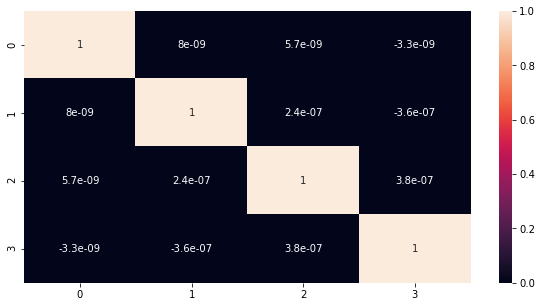

In [44]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(corrmat,annot = True)

In [52]:

pc = np.transpose(final_pcs)
pc

array([[-1.39034042e+04, -4.93397363e+03, -2.41634286e+03,
        -8.13921335e+03,  8.80644375e+03,  5.20691905e+03,
        -8.14172385e+03,  1.07956717e+03,  2.22870648e+04,
         3.35492597e+04, -1.31563713e+04,  8.19674189e+03,
         1.91862568e+03, -5.86997448e+03, -1.35918060e+04,
        -8.79760887e+03, -9.90996268e+03, -4.67047357e+03,
        -3.94870995e+02,  2.13117017e+03,  7.41994527e+04,
         1.68056170e+03, -1.40329253e+04, -1.47690972e+04,
        -1.29213073e+04, -1.26094207e+04, -8.51366924e+03,
        -1.45476901e+04, -1.33665593e+04,  8.48912074e+03,
        -5.20489195e+03, -3.31383221e+03, -1.38926149e+04,
        -1.47847642e+04, -9.05846375e+03,  2.31266930e+02,
        -1.24965150e+04,  9.65219952e+03,  3.51279793e+04,
         2.32536447e+04, -3.34225854e+03, -5.14973503e+03,
        -6.22485154e+03, -7.76869359e+03,  2.59526929e+04,
        -1.41279474e+04,  1.50667334e+04, -6.79468124e+03,
         2.76022637e+03, -1.38391805e+04, -8.11507382e+0

In [53]:

final_df = pd.DataFrame({'PC1':pc[0], 'PC2':pc[1],'PC3':pc[2], 'PC4':pc[3],'PC5':pc[4]})

In [54]:
final_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-13903.404245,372.761702,-145.918373,498.267244,4.232592
1,-4933.973633,-1567.323979,-240.892312,-835.178759,-16.736145
2,-2416.342865,-3311.251570,-638.549145,-531.244824,19.033698
3,-8139.213350,597.336551,-339.381475,882.825798,-84.017159
4,8806.443755,1111.378450,-76.958078,-1505.451857,-260.416533


In [55]:
# To perform KMeans clustering 
#Hopkins Statistics - to check cluster tendency
# Hopkins Statistics - Checking the cluster tendency
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [56]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(df_pca)

0.841556467961385

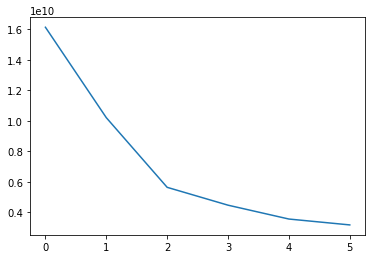

In [57]:
# Finding optimal number of clustres
# Elbow-curve
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ssd=[]
range_n_clusters = [2,3,4,5,6,7]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_pca)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)


K- means shows 4 as optimal number of clusters

In [58]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6,7,8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_pca)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6996412544524175
For n_clusters=3, the silhouette score is 0.5672708136323397
For n_clusters=4, the silhouette score is 0.5877610623906288
For n_clusters=5, the silhouette score is 0.5207031847921787
For n_clusters=6, the silhouette score is 0.5248801835468705
For n_clusters=7, the silhouette score is 0.5123876436812265
For n_clusters=8, the silhouette score is 0.5006838897831071


In [59]:
# model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state = 50)
kmeans.fit(df_pca)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [60]:
# Cluster labels
kmeans.labels_

array([1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1,
       2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2,
       1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 1])

In [67]:
final_df['cluster_id_k3'] = kmeans.labels_
final_df.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id_k4,cluster_id_k3
0,-13903.404245,372.761702,-145.918373,498.267244,4.232592,0,0
1,-4933.973633,-1567.323979,-240.892312,-835.178759,-16.736145,0,0
2,-2416.342865,-3311.251570,-638.549145,-531.244824,19.033698,3,3
3,-8139.213350,597.336551,-339.381475,882.825798,-84.017159,0,0
4,8806.443755,1111.378450,-76.958078,-1505.451857,-260.416533,3,3


In [68]:
# Number of countries in each cluster for k = 3
final_df.cluster_id_k3.value_counts()

0    88
3    39
1    18
2     3
Name: cluster_id_k3, dtype: int64

Text(0.5, 0, 'Scatter plot with k =3')

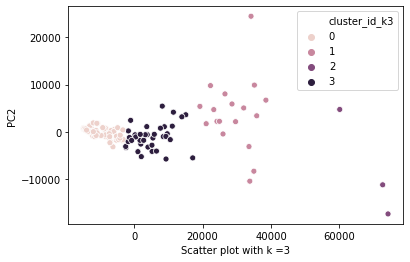

In [69]:

# Scatter plot with K = 3
sns.scatterplot(x='PC1', y='PC2', hue='cluster_id_k3',legend='full',data=final_df)
plt.xlabel("Scatter plot with k =3")

In [70]:
# Building model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50, random_state = 50)
kmeans.fit(final_df)

KMeans(max_iter=50, n_clusters=4, random_state=50)

In [71]:
kmeans.labels_

array([0, 0, 3, 0, 3, 3, 0, 3, 1, 1, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 2, 3,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 3, 1, 1, 0, 0, 0, 0,
       1, 0, 3, 0, 3, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 1, 1,
       0, 0, 3, 0, 0, 2, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 1, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 3, 0, 0, 0, 3, 1, 3,
       3, 0, 0, 1, 0, 3, 3, 0, 1, 1, 0, 3, 1, 1, 0, 0, 0, 3, 0, 0, 3, 0,
       0, 0, 0, 3, 0, 0, 0, 2, 1, 3, 0, 0, 3, 0, 0, 0])

In [72]:
final_df['cluster_id_k4'] = kmeans.labels_
final_df.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id_k4,cluster_id_k3
0,-13903.404245,372.761702,-145.918373,498.267244,4.232592,0,0
1,-4933.973633,-1567.323979,-240.892312,-835.178759,-16.736145,0,0
2,-2416.342865,-3311.251570,-638.549145,-531.244824,19.033698,3,3
3,-8139.213350,597.336551,-339.381475,882.825798,-84.017159,0,0
4,8806.443755,1111.378450,-76.958078,-1505.451857,-260.416533,3,3


In [73]:
# Count of countries in each cluster for k=4
final_df.cluster_id_k4.value_counts()

0    88
3    39
1    18
2     3
Name: cluster_id_k4, dtype: int64

Text(0.5, 0, 'Scatter plot with k =4')

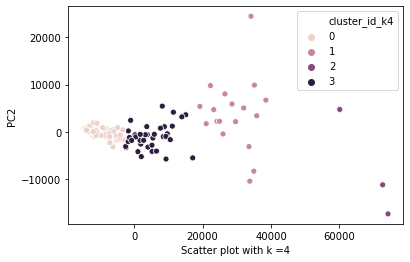

In [74]:

# Scatter plot with K = 4
sns.scatterplot(x='PC1', y='PC2', hue='cluster_id_k4',legend='full',data=final_df)
plt.xlabel("Scatter plot with k =4")

In [75]:
final_df=final_df.drop(['cluster_id_k4'], axis=1)

In [76]:

# adding 'country' column
final_df['country'] = country
final_df.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id_k3,country
0,-13903.404245,372.761702,-145.918373,498.267244,4.232592,0,Afghanistan
1,-4933.973633,-1567.323979,-240.892312,-835.178759,-16.736145,0,Albania
2,-2416.342865,-3311.251570,-638.549145,-531.244824,19.033698,3,Algeria
3,-8139.213350,597.336551,-339.381475,882.825798,-84.017159,0,Angola
4,8806.443755,1111.378450,-76.958078,-1505.451857,-260.416533,3,Antigua and Barbuda


In [77]:
# merging original dataset with 'final_df'
final_dft = pd.merge(final_df,country_df2,on='country',how='left')

In [78]:

final_dft.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id_k3,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-13903.404245,372.761702,-145.918373,498.267244,4.232592,0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,-4933.973633,-1567.323979,-240.892312,-835.178759,-16.736145,0,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,-2416.342865,-3311.251570,-638.549145,-531.244824,19.033698,3,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,-8139.213350,597.336551,-339.381475,882.825798,-84.017159,0,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,8806.443755,1111.378450,-76.958078,-1505.451857,-260.416533,3,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


In [79]:

# all the countries having high child mortality rate (above 120) are in one cluster
final_dft[final_dft['child_mort']>120]

,PC1,PC2,PC3,PC4,PC5,cluster_id_k3,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
27,-14547.690073,663.470163,-48.203015,701.661840,-14.974493,0,Central African Republic,149.0,52.63,17.75,118.19,888,2.01,47.5,5.21,446
28,-13366.559322,506.107648,-149.936372,599.328379,-15.546036,0,Chad,150.0,330.10,40.63,390.20,1930,6.39,56.5,6.59,897
58,-13878.230715,607.272174,-130.956861,453.753422,-16.575346,0,Haiti,208.0,101.29,45.74,428.31,1500,5.45,32.1,3.33,662
85,-13591.857772,319.664763,-138.686232,552.996969,-5.115077,0,Mali,137.0,161.42,35.26,248.51,1870,4.37,59.5,6.55,708
99,-14635.864839,709.557914,-137.811452,679.617618,-6.770320,0,Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348
100,-10059.926397,-688.221894,170.426699,418.289280,-7.819107,0,Nigeria,130.0,589.49,118.13,405.42,5150,104.00,60.5,5.84,2330
117,-14305.297467,473.486922,-154.877810,625.828662,31.697497,0,Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399


In [80]:
# all the countries with low income are in one cluster (i.e. cluster 0)
final_dft[final_dft['income']<12000]

,PC1,PC2,PC3,PC4,PC5,cluster_id_k3,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-13903.404245,372.761702,-145.918373,498.267244,4.232592,0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,-4933.973633,-1567.323979,-240.892312,-835.178759,-16.736145,0,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
3,-8139.213350,597.336551,-339.381475,882.825798,-84.017159,0,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
6,-8141.723853,-548.347814,141.056944,-358.456763,-118.662150,0,Armenia,18.1,669.76,141.68,1458.66,6700,7.77,73.3,1.69,3220
10,-13156.371329,-56.145133,-158.331852,481.247463,-3.350977,0,Bangladesh,49.4,121.28,26.68,165.24,2440,7.14,70.4,2.33,758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,-11299.052884,-595.836866,-277.421321,321.208099,30.553060,0,Uzbekistan,36.3,437.46,80.18,393.30,4240,16.50,68.8,2.34,1380
143,-10934.293872,1832.616185,228.274451,723.843951,-106.422746,0,Vanuatu,29.2,1384.02,155.93,1565.19,2950,2.62,63.0,3.50,2970
145,-10842.955375,-179.818500,-872.101509,178.758570,50.237055,0,Vietnam,23.3,943.20,89.60,1050.62,4490,12.10,73.1,1.95,1310
146,-11149.856635,-741.944983,-369.995031,196.491662,23.628859,0,Yemen,56.3,393.00,67.86,450.64,4480,23.60,67.5,4.67,1310


In [81]:
#Calculating Cluster Means for k=3

mean_child_mort = pd.DataFrame(final_dft.groupby(["cluster_id_k3"]).child_mort.mean())
mean_income = pd.DataFrame(final_dft.groupby(["cluster_id_k3"]).income.mean())
mean_gdpp = pd.DataFrame(final_dft.groupby(["cluster_id_k3"]).gdpp.mean())

In [82]:
df_means = pd.concat([mean_child_mort,mean_income,mean_gdpp], axis=1)

In [83]:

df_means

,child_mort,income,gdpp
cluster_id_k3,,,
0,61.153409,4622.306818,2114.590909
1,12.250000,32550.000000,25405.555556
2,9.966667,71133.333333,36266.666667
3,17.369231,17048.717949,9370.000000


In [84]:

#Cluster 0 has lowest income and gdpp, & highest child mortality rate.
#Hierarchial Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [85]:
final_df_h.head()

NameError: name 'final_df_h' is not defined

Single linkage

In [86]:
# single linkage
mergings = linkage(final_df_h, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

NameError: name 'final_df_h' is not defined

Complete linkage

In [87]:

# complete linkage
mergings_c = linkage(final_df_h, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.xlabel("Complete Linkage Dendogram")
plt.show()

NameError: name 'final_df_h' is not defined

In [ ]:
# Above dendogram shows 3 distinct clusters
cluster_labels_c = cut_tree(mergings_c, n_clusters=3).reshape(-1, )
cluster_labels_c

In [ ]:
# cluster id for complete linkage
final_dft['Hie_comp_clusterID'] = cluster_labels_c

In [ ]:
# average linkage
mergings_avg = linkage(final_df_h, method="average", metric='euclidean')
dendrogram(mergings_avg)
plt.xlabel("Average Linkage")
plt.show()

In [ ]:

# 3 clusters
cluster_labels_a = cut_tree(mergings_avg, n_clusters=3).reshape(-1, )
cluster_labels_a

In [ ]:
# Cluster Id for average linkage 
final_dft['Hie_avg_clusterID'] = cluster_labels_a


Final dataframe containing cluster_ID's from "k = 3", "hierarchial complete" and "hierarchial average" linkage

In [ ]:
# Final dataframe containing cluster_ID's from k-means, hierarchial complete and hierarchial average linkage
final_dft.head()

In [ ]:

# Mean of child_mort, income, gdpp from k-means
df_means

In [ ]:

# Clusters Formed by K-Means
sns.scatterplot(x='PC1', y='PC2', hue='cluster_id_k3',legend='full',data=final_dft)

In [ ]:
# Cluster 2 
sns.scatterplot(x='child_mort', y='income', hue='cluster_id_k3',legend='full',data=final_dft)

In [ ]:
# Mean of child_mort, income, gdpp from Hierarchial Complete Linkage
hie_com_child = final_dft.groupby(['Hie_comp_clusterID']).child_mort.mean()
hie_com_gdpp = final_dft.groupby(['Hie_comp_clusterID']).gdpp.mean()
hie_com_income = final_dft.groupby(['Hie_comp_clusterID']).income.mean()
hie_com_mean = pd.concat([hie_com_child,hie_com_gdpp,hie_com_income], axis=1)
hie_com_mean

In [ ]:
# Clusters formed by Complete Linkage
sns.scatterplot(x='PC1', y='PC2', hue='Hie_comp_clusterID',legend='full',data=final_dft)
plt.xlabel("Scatter Plot: Complete Linkage")

In [ ]:
# Mean of child_mort, income, gdpp from Average Linkage
hie_avg_child = final_dft.groupby(['Hie_avg_clusterID']).child_mort.mean()
hie_avg_gdpp = final_dft.groupby(['Hie_avg_clusterID']).gdpp.mean()
hie_avg_income = final_dft.groupby(['Hie_avg_clusterID']).income.mean()
hie_avg_mean = pd.concat([hie_avg_child,hie_avg_gdpp,hie_avg_income], axis=1)
hie_avg_mean

In [ ]:
# Cluster formation through Average Linkage
sns.scatterplot(x='PC1', y='PC2', hue='Hie_avg_clusterID',legend='full',data=final_dft)
plt.xlabel("Clusters: Hierarchial Clustering - Average Linkage")

Average Linkage and Complete Linkage have formed almost same clusters
Clusters formed by Complete Likage are more distinct as compared to K-means Clustering
Thus using Complete Linkage to find countries in the direst need of aid.

ValueError: Could not interpret input 'Hie_comp_clusterID'

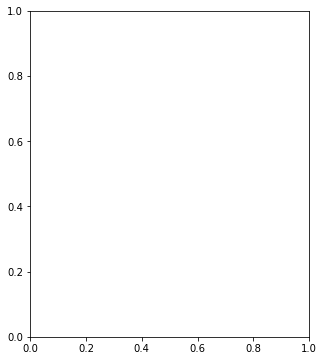

In [88]:
plt.figure(figsize = (17,6))
plt.subplot(1,3,1)
sns.boxplot(x='Hie_comp_clusterID', y = 'child_mort', data= final_dft)
plt.xlabel("Child Mortality")
plt.subplot(1,3,2)
sns.boxplot(x='Hie_comp_clusterID', y = 'income', data= final_dft)
plt.xlabel("Income Per Capita")
plt.subplot(1,3,3)
sns.boxplot(x='Hie_comp_clusterID', y = 'gdpp', data= final_dft)
plt.xlabel("GDPP")

Finding the countries in the direst need of aid

In [ ]:
# Getting under-developed countries on one dataframe
Under_Developed = final_dft[final_dft['Hie_comp_clusterID'] == 0 ]

In [ ]:
# 123 countries come under Under-Developed countries category
(final_dft['Hie_comp_clusterID'] == 0 ).sum()

In [ ]:
# means of clusters based on child_mort, income and gdpp
hie_com_mean

In [ ]:

#Using Concept of binning to fing countries in direst need of aid
# As we have to fing top conutries in need of aid we will decide the threshold based on data understanding
low_income = Under_Developed[Under_Developed['income']<6000]
low_gdpp = low_income[low_income['gdpp']<3000]
direst_need_countries = low_gdpp[low_gdpp['child_mort']>100]

Top 15 Countries in Direst Need of Aid

In [ ]:

direst_need_countries[["country",'child_mort','income','gdpp']]